In [ ]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)
conn = engine.connect()

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
    
    #---retreive data---#
data = pd.read_sql("SELECT * FROM measurement", conn)
data_df = pd.DataFrame(data)
data_df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [11]:
     #---Delete Columns---#
data_df.set_index('date').head()
del data_df['id']
del data_df['station']
del data_df['tobs']


In [12]:
    #---convert data to dates and filter to one year---#
data_df['date'] = pd.to_datetime(data_df['date'])
start_date ='2016-8-22'
end_date = '2017-8-23'
mask = (data_df['date'] > start_date) & (data_df['date'] <= end_date)



In [13]:
   #---Generate Table---#
year_range = data_df.loc[mask]
year_range.head()

,date,prcp
2363,2016-08-23,0.00
2364,2016-08-24,0.08
2365,2016-08-25,0.08
2366,2016-08-26,0.00
2367,2016-08-27,0.00


<function matplotlib.pyplot.show(*args, **kw)>

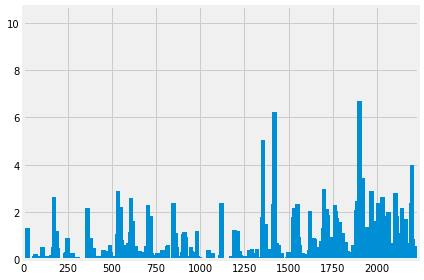

<Figure size 1440x216 with 0 Axes>

In [14]:
    #--- Generate Bar Chart---#
    
x_axis = np.arange(len(year_range))
y_axis = year_range['prcp']
plt.xlim(-.75,len(x_axis))
plt.ylim(0, max(y_axis) +4)
plt.tight_layout()
plt.bar(x_axis, y_axis, width = 25)
plt.figure(figsize=(20,3))
plt.show

In [15]:
    #---List Data Descriptions--_#
year_range.describe()    


,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [16]:
 # --- Find the Number of Weather Stations--# 
station_count = session.query(Station).count()
print(f"The number of weather stations on Honolulu Hawaii are {station_count}.")
  
   

The number of weather stations on Honolulu Hawaii are 9.


In [17]:
  #---List the Stations by Observations Amount Descending---#
station_observations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_observations
    

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
 #---Find the Weather Station with the Most Observations ---#
Top_Station_Observations = print(f'{station_observations[0][0]} {station_observations[0][1]}')


USC00519281 2772


In [22]:
 #---Min,Max, and Average Obseravtions---#
station_descriptons = station_observations[0][0]
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                filter(Measurement.station == station_descriptons).all()



[(54.0, 85.0, 71.66378066378067)]

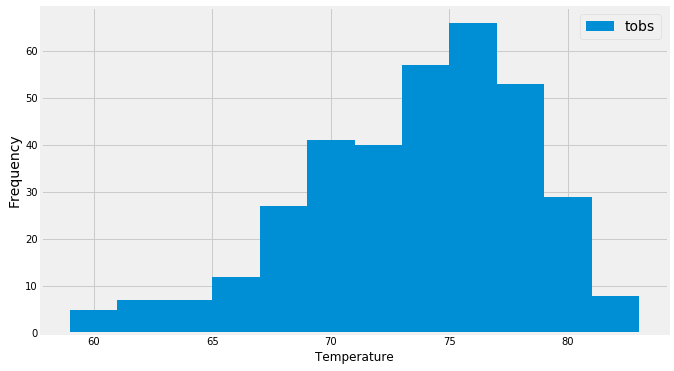

In [23]:
    #---Histogram---#
results = session.query(Measurement.tobs, Measurement.date).\
filter(Measurement.date >= '2016-08-23', Measurement.date <= '2017-08-23', Measurement.station == station_descriptons).all()

df = pd.DataFrame(results)

# Plot the results as a histogram with bins=12.
df.plot.hist(bins=12, figsize=(10,6))
plt.ylabel('Frequency', size=14)
plt.xlabel('Temperature')
plt.legend( prop={'size': 14})
plt.show()

In [24]:
#---Calculate Vacation Date Weather Predictions---#

def calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2017-05-28', '2017-06-05'))

[(71.0, 77.28301886792453, 82.0)]
